## CSE5ML Lab 5: Clustering
In this lab we will show you, how you can use the kmean clustering algorithm which is an unsupervised method.

## Clustering
* Unlike classification, the model is not provided with the correct labeling of data during training
* Can be used to divide data into number of groups solely based on their statistical characteristics
* Clustering can be performed even if we only have labels available for very small number of data in the dataset (i.e. very limited sample of each class)

## Kmeans Algorithm
k-means clustering algorithm is an unsupervised clustering method that aims to partition n observations into k clusters. Then, each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

#### Define a fake dataset

In [1]:
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
    [10, 2], [10, 4], [10, 0]])

#### Build a Kmeans model with 2 clusters

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

#### Get predicted cluster labels for each data sample

In [3]:
print('labels:',kmeans.labels_)

labels: [1 1 1 0 0 0]


#### Make cluster prediction for given data

In [4]:
print('prediction:',kmeans.predict([[0, 0], [12, 3]]))

prediction: [1 0]


#### Get cluster center for each cluster

In [5]:
print('kmeans.cluster_centers_:',kmeans.cluster_centers_)

kmeans.cluster_centers_: [[10.  2.]
 [ 1.  2.]]


### Another example on a larger generated dataset

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
np.random.seed(0)
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7) # make_blobs() function can be used to generate blobs of points with a Gaussian distribution. 

# #############################################################################
# Compute clustering with Means

kmeans = KMeans(n_clusters=3, n_init=15, random_state=0) # n_init: number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

kmeans.fit(X)
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
print(kmeans_cluster_centers)

[[ 1.07621886 -1.06625689]
 [-1.07094261 -1.00512907]
 [ 0.96903436  1.02005354]]


we can find that the cluster centres found by KMeans are very close to our original generated data samples [[1, 1], [-1, -1], [1, -1]]

Text(0.5, 1.0, 'KMeans')

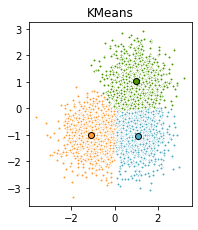

In [7]:
# Plotting
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = kmeans_labels == k
    cluster_center = kmeans_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')

In [8]:
# check how many data samples in each cluster
unique_labels, unique_counts = np.unique(kmeans_labels, return_counts=True)
dict(zip(unique_labels, unique_counts))

{0: 960, 1: 1016, 2: 1024}

### Let's try apply kmeans on the vehicle dataset we used in Lab 3

Try to implement the data preprocessing yourself. The entire process should include: loading the data, drop the column that we do not need, handingling missing values, handling duplicates, dealing with text in the data (removing the units from the values, dealing with categorical variables), transforming the variable year to age,  extracting values from input variables (define inputs variables and the target variable), and scaling the variables with min-max normalization

Note: since k means method prefers standardized (scaled) data, it is better to apply min-max normalizatin before building the clustering model

### Now try build a kmeans model with 3 clusters with our vehicle data X

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

#### check how many data samples in each cluster

In [11]:
kmeans_labels = kmeans.labels_
unique_labels, unique_counts = np.unique(kmeans_labels, return_counts=True)
dict(zip(unique_labels, unique_counts))

{0: 662, 1: 2703, 2: 3174}

####  Finding the optimum number of clusters for k-means clustering
One easy but popular method is using Elbow Curve.
Explanation of Score in the code below: The objective in the K-means is to reduce the sum of squares of the distances of points from their respective cluster centroids (the opposite of score). This value tells how internally coherent the clusters are (The less the better).

C:\Users\melody\Documents\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=26.
  warnings.warn(


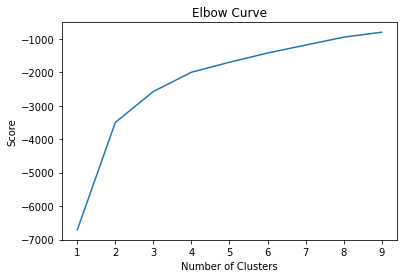

In [12]:
import matplotlib.pyplot as plt

num_cluster = range(1, 10)
kmeans_list = [KMeans(n_clusters=i) for i in num_cluster]
kmeans_list
scores = [kmeans_list[i].fit(X).score(X) for i in range(len(kmeans_list))]
scores
plt.plot(num_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. Now that we have the optimum amount of clusters (k=3).

#### Extract prototype for each cluster
We can find the indexes of the data samples that are closest to the k means cluster centre, then we can indentify the difference and similarity between the clusters by using the prototypes

In [13]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

kmeans_cluster_centers = kmeans.cluster_centers_
closest = pairwise_distances_argmin(kmeans.cluster_centers_, X)

# show the three data samples that can represent the three clusters
dataset.iloc[closest, :]

,selling_price,km_driven,owner,mileage,engine,max_power,seats,age,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
6951,591000,60000,1,21.49,1498,108.50,5.0,5,0,1,0,0,1,0,0,0,1
982,310000,70000,1,19.81,1086,68.05,5.0,8,0,0,0,1,0,1,0,0,1
5214,575000,90000,1,20.54,1598,103.60,5.0,7,0,1,0,0,0,1,0,0,1


Some other clustering methods that are available in scikit learn packages can be found here: https://scikit-learn.org/stable/modules/clustering.html#:~:text=2.3.1.%20Overview%20of%20clustering%20methods%20%C2%B6%20%20,nearest-neighbor%20gr%20...%20%206%20more%20rows%20

### Answer to the above questions

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def remove_unit(df,colum_name) :
    t = []
    for i in df[colum_name]:
        number = str(i).split(' ')[0]
        t.append(number)
    return t

# load dataset
dataset = pd.read_csv("Car details.csv")

# drop the columns that we are not going to use, here, we are droping the car name
dataset.drop(['name'], axis=1, inplace=True)
dataset = dataset.dropna()
dataset = dataset.drop_duplicates()

# remove units from values
dataset['mileage'] = remove_unit(dataset,'mileage')
dataset['engine'] = remove_unit(dataset,'engine')
dataset['max_power'] = remove_unit(dataset,'max_power')

# transform the column type to float
dataset['mileage'] = pd.to_numeric(dataset['mileage'])
dataset['engine'] = pd.to_numeric(dataset['engine'])
dataset['max_power'] = pd.to_numeric(dataset['max_power'])

#transform year to age
dataset['age'] = 2021 - dataset['year']
dataset.drop(['year'], axis = 1, inplace = True)

#deal with categorical(nominal) variables
dataset['owner'] = dataset['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3})
dataset = pd.get_dummies(dataset, columns=['fuel', 'seller_type', 'transmission'])

# get input data
array = dataset.values
X = array[:,1:17]

# the processes later to build kmean model, prefers normalized data
# fit scaler on training data
norm = MinMaxScaler().fit(X)
X = norm.transform(X)